<h1>9 Plotting and Visualization</h1>

<p>Making informative visualizations (sometimes called plots) is one of the most important tasks in data analysis. It may be a part of the exploratory process—for example, to help identify outliers or needed data transformations, or as a way of generating ideas for models. For others, building an interactive visualization for the web may be the end goal. Python has many add-on libraries for making static or dynamic visualizations, but I’ll be mainly focused on <a href="https://matplotlib.org/">matplotlib</a> and libraries that build on top of it.</p>

<p>matplotlib is a desktop plotting package designed for creating plots and figures suitable for publication. The project was started by John Hunter in 2002 to enable a MATLAB-like plotting interface in Python. The matplotlib and IPython communities have collaborated to simplify interactive plotting from the IPython shell (and now, Jupyter notebook). matplotlib supports various GUI backends on all operating systems and can export visualizations to all of the common vector and raster graphics formats (PDF, SVG, JPG, PNG, BMP, GIF, etc.). With the exception of a few diagrams, nearly all of the graphics in this book were produced using matplotlib.</p>

<p>Over time, matplotlib has spawned a number of add-on toolkits for data visualization that use matplotlib for their underlying plotting. One of these is <a href="http://seaborn.pydata.org/">seaborn</a>, which we explore later in this chapter.</p>

In [1]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
pd.options.display.max_columns = 20
np.random.seed(12345)
#plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True);

<h2>9.1 A Brief matplotlib API Primer</h2>
<p>With matplotlib, we use the following import convention:</p>

In [2]:
import matplotlib.pyplot as plt

<p>After running <code>%matplotlib notebook</code> in Jupyter (or simply <code>%matplotlib</code> in IPython), we can try creating a simple plot. If everything is set up right, a line plot should appear:</p>

In [3]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

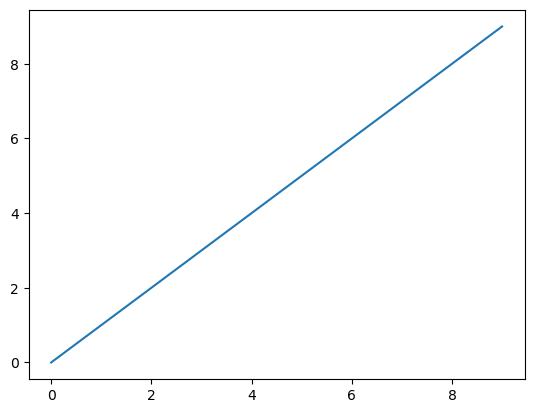

In [4]:
plt.plot(data);

<p>While libraries like seaborn and pandas's built-in plotting functions will deal with many of the mundane details of making plots, should you wish to customize them beyond the function options provided, you will need to learn a bit about the matplotlib API.</p>

<h3>Figures and Subplots</h3>

<p>Plots in matplotlib reside within a <code>Figure</code> object. You can create a new figure with <code>plt.figure</code>:</p>

<p><code>fig = plt.figure()</code></p>

<p>In IPython, if you first run <code>%matplotlib</code> to set up the matplotlib integration, an empty plot window will appear, but in Jupyter nothing will be shown until we use a few more commands.</p>

<p><code>plt.figure</code> has a number of options; notably, <code>figsize</code> will guarantee the figure has a certain size and aspect ratio if saved to disk.</p>

<p>You can’t make a plot with a blank figure. You have to create one or more <code>subplots</code> using <code>add_subplot</code>:</p>

<p><code>ax1 = fig.add_subplot(2, 2, 1)</code></p>

<p>This means that the figure should be 2 × 2 (so up to four plots in total), and we’re selecting the first of four subplots (numbered from 1). If you create the next two subplots, you’ll end up with a visualization that looks like the next figure:</p>

<p><code>ax2 = fig.add_subplot(2, 2, 2)<br />
ax3 = fig.add_subplot(2, 2, 3)</code></p>

<p><strong>Tip</strong><br />
    One nuance of using Jupyter notebooks is that <em>plots are reset </em> after each cell is evaluated, so you must put all of the plotting commands in a single notebook cell.</p>

<p>Here we run all of these commands in the same cell:</p>

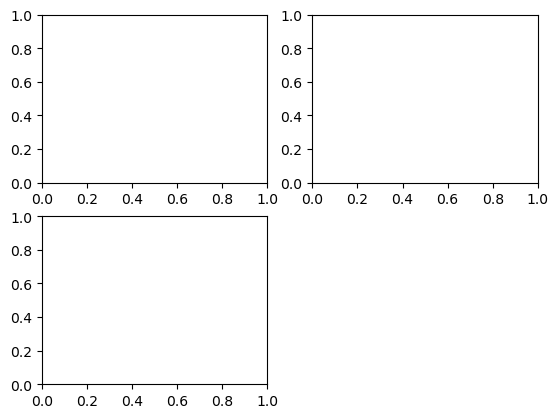

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

<p>These plot axis objects have various methods that create different types of plots, and it is preferred to use the axis methods over the top-level plotting functions like <code>plt.plot</code>. For example, we could make a line plot with the plot method:</p>

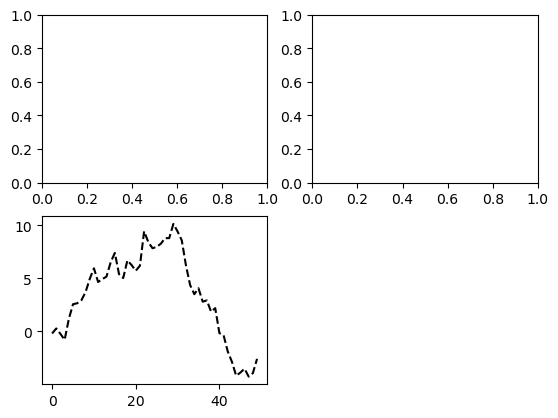

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax3.plot(np.random.standard_normal(50).cumsum(), color="black",
         linestyle="dashed")

<p>You may notice output like <code>&lt;matplotlib.lines.Line2D at ...&gt;</code> when you run this. matplotlib returns objects that reference the plot subcomponent that was just added. A lot of the time you can safely ignore this output, or you can put a semicolon at the end of the line to suppress the output.</p>

<p>The additional options instruct matplotlib to plot a black dashed line. The objects returned by <code>fig.add_subplot</code> here are <code>AxesSubplot</code> objects, on which you can directly plot on the other empty subplots by calling each one’s instance method:</p>

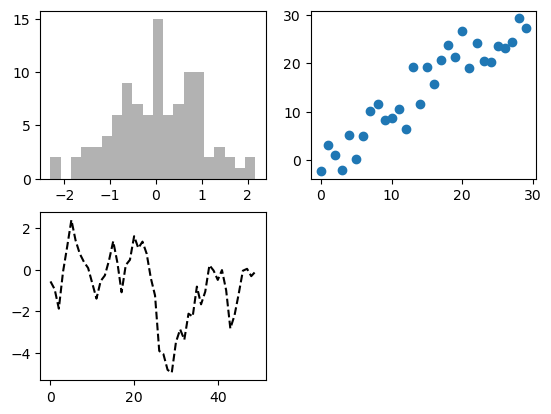

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax1.hist(np.random.standard_normal(100), bins=20, color="black", 
         alpha=0.3);
ax2.scatter(np.arange(30), 
            np.arange(30) + 3 * np.random.standard_normal(30));
ax3.plot(np.random.standard_normal(50).cumsum(), color="black",
         linestyle="dashed");

<p>The style option <code>alpha=0.3</code> sets the transparency of the overlaid plot.</p>

<p>You can find a comprehensive catalog of plot types in the <a href="https://matplotlib.org/">matplotlib documentation</a>.</p>

<p>To make creating a grid of subplots more convenient, matplotlib includes a <code>plt.subplots</code> method that creates a new figure and returns a NumPy array containing the created subplot objects:</p>

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

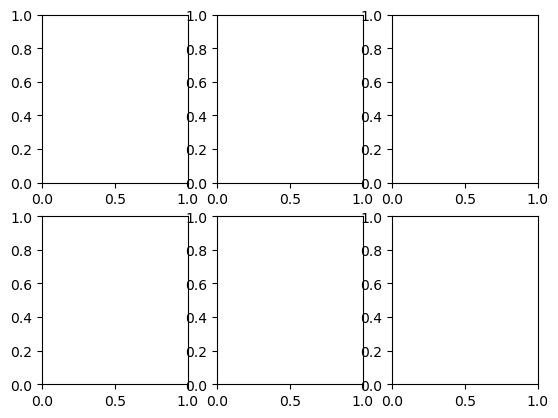

In [8]:
fig, axes = plt.subplots(2, 3)
axes

<p>The <code>axes</code> array can then be indexed like a two-dimensional array; for example, <code>axes[0, 1]</code> refers to the subplot in the top row at the center. You can also indicate that subplots should have the same x- or y-axis using <code>sharex</code> and <code>sharey</code>, respectively. This can be useful when you're comparing data on the same scale; otherwise, matplotlib autoscales plot limits independently. See Table 9.1 for more on this method.</p>

<table id="Table_9.1">
    <caption>Table 9.1: <code>matplotlib.pyplot.subplots</code>options</caption>
    <tr>
        <th>Argument</th>
        <th>Description</th>
    </tr>
    <tr>
        <td><code>nrows</code></td>
        <td>Number of rows of subplots</td>
    </tr>
    <tr>
        <td><code>ncols</code></td>
        <td>Number of columns of subplots</td>
    </tr><tr>
        <td><code>sharex</code></td>
    <td>All subplots should use the same x-axis ticks (adjusting the <code>xlim</code> will affect all subplots)</td>
    </tr>    
    <tr>
        <td><code>sharey</code></td>
        <td>All subplots should use the same y-axis ticks (adjusting the <code>ylim</code> will affect all subplots)</td>
    </tr>
    <tr>
        <td><code>subplot_kw</code></td>
        <td>Dictionary of keywords passed to <code>add_subplot</code> call used to create each subplot</td>
    </tr>    
    <tr>
        <td><code>**fig_kw</code></td>
        <td>Additional keywords to <code>subplots</code> are used when creating the figure, such as <code>plt.subplots(2, 2, figsize=(8, 6))</code></td>
    </tr>
</table>
<h3>Adjusting the spacing around subplots</h3>
<p>By default, matplotlib leaves a certain amount of padding around the outside of the subplots and in spacing between subplots. This spacing is all specified relative to the height and width of the plot, so that if you resize the plot either programmatically or manually using the GUI window, the plot will dynamically adjust itself. You can change the spacing using the <code>subplots_adjust</code> method on Figure objects:</p>

<pre>
subplots_adjust(left=None, bottom=None, right=None, top=None,
    wspace=None, hspace=None)</pre>

<p><code>wspace</code> and <code>hspace</code> control the percent of the figure width and figure height, respectively, to use as spacing between subplots. Here is a small example you can execute in Jupyter where I shrink the spacing all the way to zero (see next figure):</p>

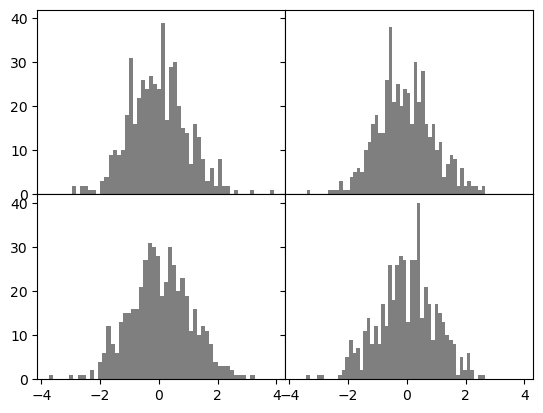

In [9]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500), bins=50,
                        color="black", alpha=0.5)
fig.subplots_adjust(wspace=0, hspace=0)

<p>You may notice that the axis labels overlap. matplotlib doesn’t check whether the labels overlap, so in a case like this you would need to fix the labels yourself by specifying explicit tick locations and tick labels (we'll look at how to do this in the later section Ticks, Labels, and Legends).</p>

<h3>Colors, Markers, and Line Styles</h3>

<p>matplotlib’s line <code>plot</code> function accepts arrays of x and y coordinates and optional color styling options. For example, to plot <code>x</code> versus <code>y</code> with green dashes, you would execute:</p>
<pre>
ax.plot(x, y, linestyle="--", color="green")
</pre>

<p>A number of color names are provided for commonly used colors, but you can use any color on the spectrum by specifying its hex code (e.g., <code>"#CECECE"</code>). You can see some of the supported line styles by looking at the docstring for <code>plt.plot</code> (use <code>plt.plot?</code> in IPython or Jupyter). A more comprehensive reference is available in the online documentation.</p>

<p>Line plots can additionally have markers to highlight the actual data points. Since matplotlib's <code>plot</code> function creates a continuous line plot, interpolating between points, it can occasionally be unclear where the points lie. The marker can be supplied as an additional styling option (see next figure):</p>

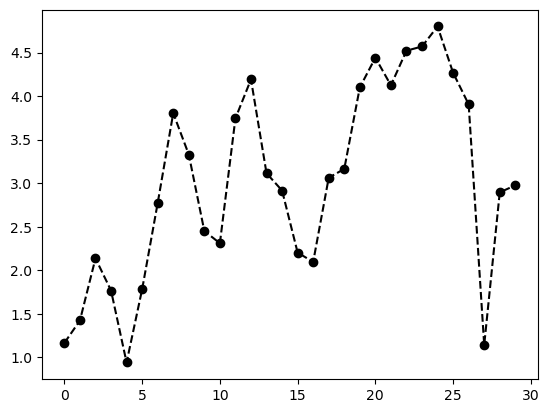

In [10]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.random.standard_normal(30).cumsum(), color="black",
        linestyle="dashed", marker="o");

<p>For line plots, you will notice that subsequent points are linearly interpolated by default. This can be altered with the <code>drawstyle</code> option (see next figure):</p>

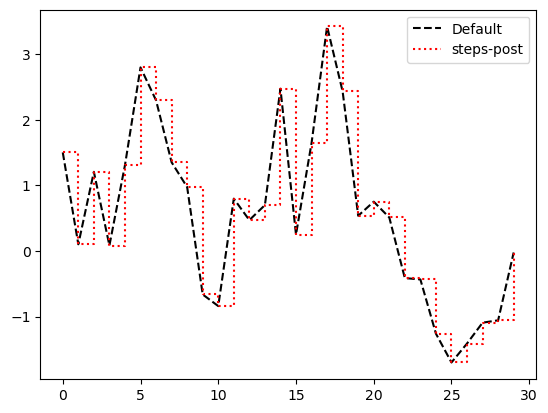

In [11]:
fig = plt.figure()
ax = fig.add_subplot()
data = np.random.standard_normal(30).cumsum()
ax.plot(data, color="black", linestyle="dashed", label="Default");
ax.plot(data, color="red", linestyle="dotted",
        drawstyle="steps-post", label="steps-post");
ax.legend();

<p>Here, since we passed the <code>label</code> arguments to <code>plot</code>, we are able to create a plot legend to identify each line using <code>ax.legend</code>. I discuss legends more in Ticks, Labels, and Legends.</p>

<p><strong>Note</strong><br />
    You must call <code>ax.legend</code> to create the legend, whether or not you passed the label options when plotting the data.</p>

<h3>Ticks, Labels, and Legends</h3>

<p>Most kinds of plot decorations can be accessed through methods on matplotlib axes objects. This includes methods like <code>xlim</code>, <code>xticks</code>, and <code>xticklabels</code>. These control the plot range, tick locations, and tick labels, respectively. They can be used in two ways:</p>
<ul>
    <li>Called with no arguments returns the current parameter value (e.g., <code>ax.xlim()</code> returns the current x-axis plotting range)</li>
    <li>Called with parameters sets the parameter value (e.g., <code>ax.xlim([0, 10])</code> sets the x-axis range to 0 to 10)</li>
</ul>
<p>All such methods act on the active or most recently created <code>AxesSubplot</code>. Each corresponds to two methods on the subplot object itself; in the case of <code>xlim</code>, these are <code>ax.get_xlim</code> and <code>ax.set_xlim</code>.</p>
<h4>Setting the title, axis labels, ticks, and tick labels</h4>

<p>To illustrate customizing the axes, I’ll create a simple figure and plot of a random walk (see next figure):</p>

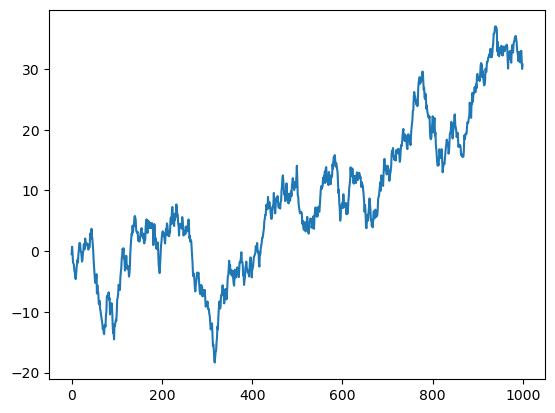

In [12]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum());

<p>To change the x-axis ticks, it’s easiest to use <code>set_xticks</code> and <code>set_xticklabels</code>. The former instructs matplotlib where to place the ticks along the data range; by default these locations will also be the labels. But we can set any other values as the labels using <code>set_xticklabels</code>.</p>

<p>The <code>rotation</code> option sets the x tick labels at a 30-degree rotation. Lastly, <code>set_xlabel</code> gives a name to the x-axis, and <code>set_title</code> is the subplot title (see next figure for the resulting figure):</p>

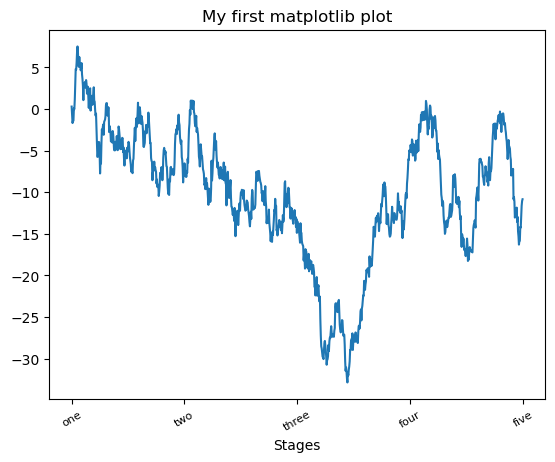

In [13]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum());
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"],
                            rotation=30, fontsize=8)
ax.set_xlabel("Stages")
ax.set_title("My first matplotlib plot");

<p>Modifying the y-axis consists of the same process, substituting <code>y</code> for <code>x</code> in this example. The axes class has a <code>set</code> method that allows batch setting of plot properties. From the prior example, we could also have written:</p>

<p><code>ax.set(title='My first matplotlib plot', xlabel='Stages')</code></p>

<h4>Adding legends</h4>
<p>Legends are another critical element for identifying plot elements. There are a couple of ways to add one. The easiest is to pass the <code>label</code> argument when adding each piece of the plot:</p>

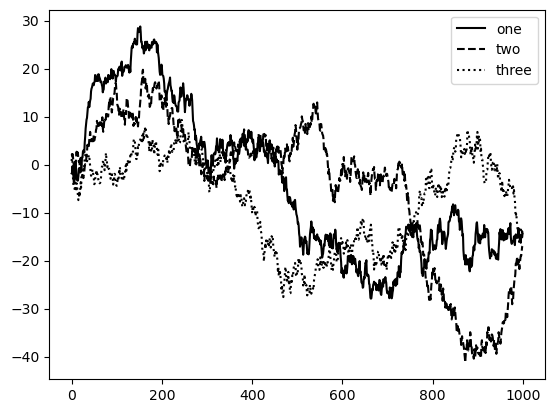

In [14]:
fig, ax = plt.subplots()
ax.plot(np.random.randn(1000).cumsum(), color="black", label="one");
ax.plot(np.random.randn(1000).cumsum(), color="black", 
        linestyle="dashed",label="two");
ax.plot(np.random.randn(1000).cumsum(), color="black", 
        linestyle="dotted",label="three");
# Call ax.legend() to automatically create legends
ax.legend();

<p>The <code>legend</code> method has several other choices for the location <code>loc</code> argument. See the docstring (with <code>ax.legend?</code>) for more information.</p>

<p>The <code>loc</code> legend option tells matplotlib where to place the plot. The default is <code>"best"</code>, which tries to choose a location that is most out of the way. To exclude one or more elements from the legend, pass no label or <code>label="_nolegend_"</code>.</p>

<h3>Annotations and Drawing on a Subplot</h3>

<p>In addition to the standard plot types, you may wish to draw your own plot annotations, which could consist of text, arrows, or other shapes. You can add annotations and text using the <code>text</code>, <code>arrow</code>, and <code>annotate</code> functions. <code>text</code> draws text at given coordinates <code>(x, y)</code> on the plot with optional custom styling:</p>

<p><code>ax.text(x, y, 'Hello world!', family='monospace', fontsize=10)</code></p>

<p>Annotations can draw both text and arrows arranged appropriately. As an example, let’s plot the closing S&amp;P 500 index price since 2007 (obtained from Yahoo! Finance) and annotate it with some of the important dates from the 2008–2009 financial crisis. You can run this code example in a single cell in a Jupyter notebook. See next figure for the result:</p>

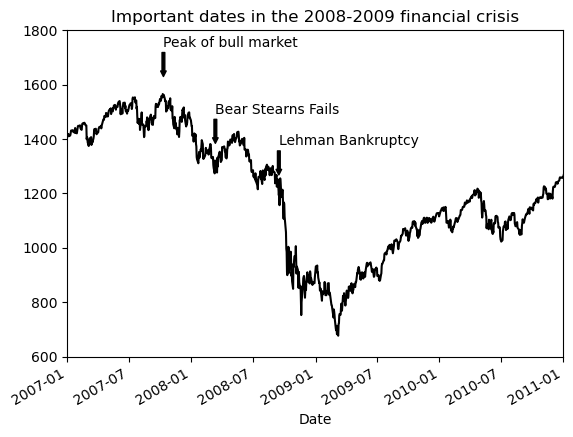

In [15]:
from datetime import datetime

fig, ax = plt.subplots()

data = pd.read_csv("examples/spx.csv", index_col=0, parse_dates=True)
spx = data["SPX"]

spx.plot(ax=ax, color="black")

crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor="black", headwidth=4, 
                                width=2,headlength=4),
                horizontalalignment="left", verticalalignment="top")

# Zoom in on 2007-2010
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])

ax.set_title("Important dates in the 2008-2009 financial crisis");

<p>There are a couple of important points to highlight in this plot. The <code>ax.annotate</code> method can draw labels at the indicated x and y coordinates. We use the <code>set_xlim</code> and <code>set_ylim</code> methods to manually set the start and end boundaries for the plot rather than using matplotlib's default. Lastly, <code>ax.set_title</code> adds a main title to the plot.</p>

<p>See the online matplotlib gallery for many more annotation examples to learn from.</p>

<p>Drawing shapes requires some more care. matplotlib has objects that represent many common shapes, referred to as patches. Some of these, like <code>Rectangle</code> and <code>Circle</code>, are found in <code>matplotlib.pyplot</code>, but the full set is located in <code>matplotlib.patches</code>.</p>

<p>To add a shape to a plot, you create the patch object and add it to a subplot ax by passing the patch to <code>ax.add_patch</code> (see next figure):</p>

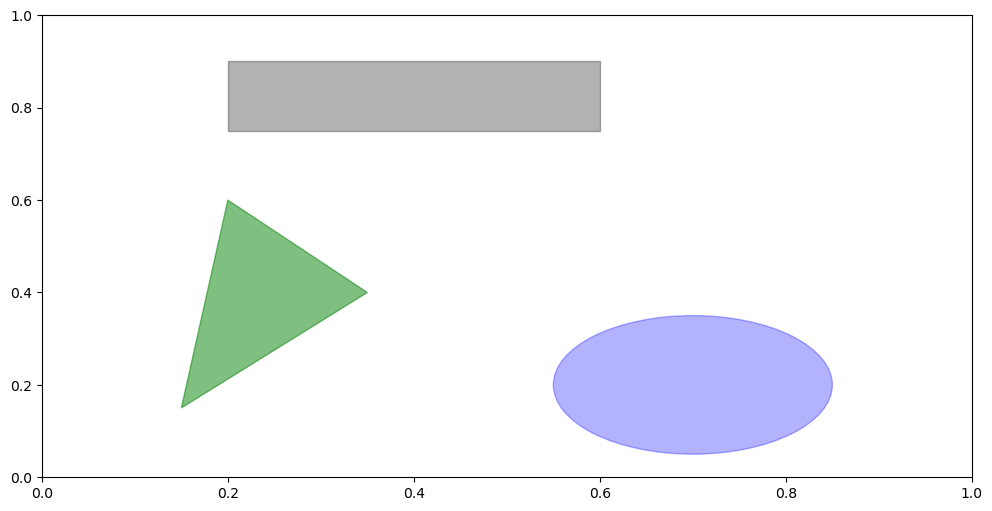

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color="green", alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon);

<p>If you look at the implementation of many familiar plot types, you will see that they are assembled from patches.</p>
<h3>Saving Plots to File</h3>

<p>You can save the active figure to file using the figure object’s <code>savefig</code> instance method. For example, to save an SVG version of a figure, you need only type:</p>

<p><code>fig.savefig("figpath.svg")</code></p>

<p>The file type is inferred from the file extension. So if you used <code>.pdf</code> instead, you would get a PDF. One important option that I use frequently for publishing graphics is <code>dpi</code>, which controls the dots-per-inch resolution. To get the same plot as a PNG at 400 DPI, you would do:</p>

<p><code>fig.savefig("figpath.png", dpi=400)</code></p>

<p>See <a href='#table_9.2'>Table 9.2</a> for a list of some other options for <code>savefig</code>. For a comprehensive listing, refer to the docstring in IPython or Jupyter.</p>

<table id="Table_9.2">
    <caption>Table 9.2: Some <code>fig.savefig</code>options</caption>
    <tr>
        <th>Argument</th>
        <th>Descripction</th>
    </tr>
    <tr>
        <td><code>fname</code></td>
        <td>String containing a filepath or a Python file-like object. The figure format is inferred from the file extension (e.g., <code>.pdf</code> for PDF or <code>.png</code> for PNG).</td>
    </tr>
    <tr>
        <td><code>dpi</code></td>
        <td>The figure resolution in dots per inch; defaults to 100 in IPython or 72 in Jupyter out of the box but can be configured.</td>
    </tr>
    <tr>
        <td><code>facecolor, edgecolor</code></td>
        <td>The color of the figure background outside of the subplots; <code>"w"</code> (white), by default.</td>
    </tr>
    <tr>
        <td><code>format</code></td>
        <td>The explicit file format to use (<code>"png"</code>, <code>"pdf"</code>, <code>"svg"</code>, <code>"ps"</code>, <code>"eps"</code>, ...).</td>
    </tr>
</table>
<h3>matplotlib Configuration</h3>

<p>matplotlib comes configured with color schemes and defaults that are geared primarily toward preparing figures for publication. Fortunately, nearly all of the default behavior can be customized via global parameters governing figure size, subplot spacing, colors, font sizes, grid styles, and so on. One way to modify the configuration programmatically from Python is to use the <code>rc</code> method; for example, to set the global default figure size to be 10 × 10, you could enter:</p>

<p><code>plt.rc("figure", figsize=(10, 10))</code></p>

<p>All of the current configuration settings are found in the <code>plt.rcParams</code> dictionary, and they can be restored to their default values by calling the <code>plt.rcdefaults()</code> function.</p>

<p>The first argument to <code>rc</code> is the component you wish to customize, such as <code>"figure"</code>, <code>"axes"</code>, <code>"xtick"</code>, <code>"ytick"</code>, <code>"grid"</code>, <code>"legend"</code>, or many others. After that can follow a sequence of keyword arguments indicating the new parameters. A convenient way to write down the options in your program is as a dictionary:<p>

<p><code>plt.rc("font", family="monospace", weight="bold", size=8)</code></p>

<p>For more extensive customization and to see a list of all the options, matplotlib comes with a configuration file <em>matplotlibrc</em> in the <em>matplotlib/mpl-data</em> directory. If you customize this file and place it in your home directory titled <em>.matplotlibrc</em>, it will be loaded each time you use matplotlib.</p>

<p>As we'll see in the next section, the seaborn package has several built-in plot themes or styles that use matplotlib's configuration system internally.</p>

<h2>9.2 Plotting with pandas and seaborn</h2>

<p>matplotlib can be a fairly low-level tool. You assemble a plot from its base components: the data display (i.e., the type of plot: line, bar, box, scatter, contour, etc.), legend, title, tick labels, and other annotations.</p>

<p>In pandas, we may have multiple columns of data, along with row and column labels. pandas itself has built-in methods that simplify creating visualizations from DataFrame and Series objects. Another library is <a href="https://seaborn.pydata.org/">seaborn</a>, a high-level statistical graphics library built on matplotlib. seaborn simplifies creating many common visualization types.</p>

<h3>Line Plots</h3>

<p>Series and DataFrame have a <code>plot</code> attribute for making some basic plot types. By default, <code>plot()</code> makes line plots (see next figure):</p>

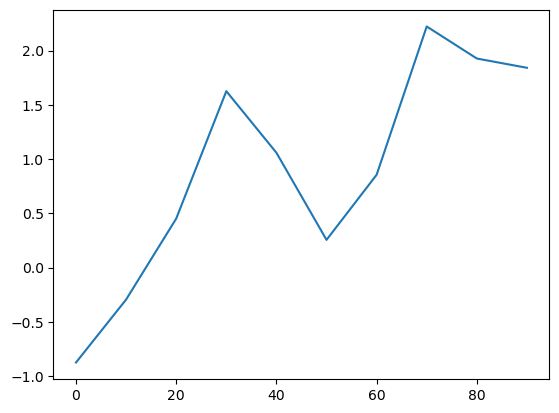

In [17]:
s = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0, 100, 10))
s.plot();

<p>The Series object’s index is passed to matplotlib for plotting on the x-axis, though you can disable this by passing <code>use_index=False</code>. The x-axis ticks and limits can be adjusted with the <code>xticks</code> and <code>xlim</code> options, and the y-axis respectively with <code>yticks</code> and <code>ylim</code>. See <a href="Table_9.3">Table 9.3</a> for a partial listing of plot options. I’ll comment on a few more of them throughout this section and leave the rest for you to explore.</p>
<table id="Table_9.3">
    <caption>Table 9.3: <code>Series.plot</code>method arguments</caption>
    <tr>
        <th>Argument</th>
        <th>Descripction</th>
    </tr>
    <tr>
        <td><code>label</code></td>
        <td>Label for plot legend</td>
    </tr>
    <tr>
        <td><code>ax</code></td>
        <td>matplotlib subplot object to plot on; if nothing passed, uses active matplotlib subplot</td>
    </tr>
    <tr>
        <td><code>style</code></td>
        <td>Style string, like <code>"ko--"</code>, to be passed to matplotlib</td>
    </tr>
    <tr>
        <td><code>alpha</code></td>
        <td>The plot fill opacity (from 0 to 1)</td>
    </tr>
    <tr>
        <td><code>kind</code></td>
        <td>Can be <code>"area"</code>, <code>"bar"</code>, <code>"barh"</code>, <code>"density"</code>, <code>"hist"</code>, <code>"kde"</code>, <code>"line"</code>, or <code>"pie"</code>; defaults to <code>"line"</code></td>
    </tr>
    <tr>
        <td><code>figsize</code></td>
        <td>Size of the figure object to create</td>
    </tr>
    <tr>
        <td><code>logx</code></td>
        <td>Pass <code>True</code> for logarithmic scaling on the x axis; pass <code>"sym"</code> for symmetric logarithm that permits negative values</td>
    </tr>
    <tr>
        <td><code>logy</code></td>
        <td>Pass <code>True</code> for logarithmic scaling on the y axis; pass <code>"sym"</code> for symmetric logarithm that permits negative values</td>
    </tr>
    <tr>
        <td><code>title</code></td>
        <td>Title to use for the plot</td>
    </tr>
    <tr>
        <td><code>use_index</code></td>
        <td>Use the object index for tick labels</td>
    </tr>
    <tr>
        <td><code>rot</code></td>
        <td>Rotation of tick labels (0 through 360)</td>
    </tr>
    <tr>
        <td><code>xticks</code></td>
        <td>Values to use for x-axis ticks</td>
    </tr>
    <tr>
        <td><code>yticks</code></td>
        <td>Values to use for y-axis ticks</td>
    </tr>
    <tr>
        <td><code>xlim</code></td>
        <td>x-axis limits (e.g., <code>[0, 10]</code>)</td>
    </tr>
    <tr>
        <td><code>ylim</code></td>
        <td>y-axis limits</td>
    </tr>
</table>

<p>Most of pandas’s plotting methods accept an optional <code>ax</code> parameter, which can be a matplotlib subplot object. This gives you more flexible placement of subplots in a grid layout.</p>

<p>DataFrame’s <code>plot</code> method plots each of its columns as a different line on the same subplot, creating a legend automatically (see next figure):</p>

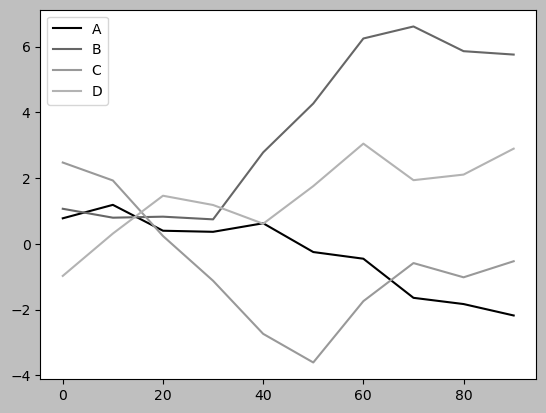

In [18]:
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0),
                  columns=["A", "B", "C", "D"],
                  index=np.arange(0, 100, 10))
plt.style.use('grayscale')
df.plot();

<p><strong>Note</strong><br />
    Here I used <code>plt.style.use('grayscale')</code> to switch to a color scheme more suitable for black and white publication, since some readers will not be able to see the full color plots.</p>

<p>The <code>plot</code> attribute contains a "family" of methods for different plot types. For example, <code>df.plot()</code> is equivalent to <code>df.plot.line()</code>. We'll explore some of these methods next.</p>

<p><strong>Note</strong><br />
    Additional keyword arguments to <code>plot</code> are passed through to the respective matplotlib plotting function, so you can further customize these plots by learning more about the matplotlib API.</p>

<p>DataFrame has a number of options allowing some flexibility for how the columns are handled, for example, whether to plot them all on the same subplot or to create separate subplots. See <a href="#Table_9.4">Table 9.4</a> for more on these.</p>

<table id="Table_9.4">
    <caption>Table 9.4: DataFrame-specific plot arguments</caption>
    <tr>
        <th>Argument</th>
        <th>Descripction</th>
    </tr>
    <tr>
        <td><code>subplots</code></td>
        <td>Plot each DataFrame column in a separate subplot</td>
    </tr>
    <tr>
        <td><code>layouts</code></td>
        <td>2-tuple (rows, columns) providing layout of subplots</td>
    </tr>
    <tr>
        <td><code>sharex</code></td>
        <td>If <code>subplots=True</code>, share the same x-axis, linking ticks and limits</td>
    </tr>
    <tr>
        <td><code>sharey</code></td>
        <td>If <code>subplots=True</code>, share the same y-axis</td>
    </tr>
    <tr>
        <td><code>legend</code></td>
        <td>Add a subplot legend (<code>True</code> by default)</td>
    </tr>
    <tr>
        <td><code>sort_columns</code></td>
        <td>Plot columns in alphabetical order; by default uses existing column order</td>
    </tr>
</table>

<h2>Bar Plots</h2>

<p>The <code>plot.bar()</code> and <code>plot.barh()</code> make vertical and horizontal bar plots, respectively. In this case, the Series or DataFrame index will be used as the x (<code>bar</code>) or y (<code>barh</code>) ticks (see next figure):</p>

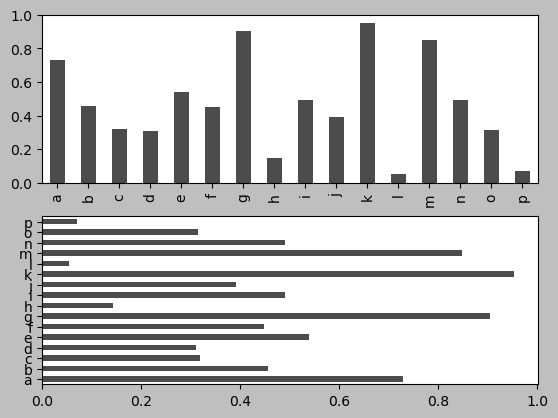

In [19]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.uniform(size=16), 
                 index=list("abcdefghijklmnop"))
data.plot.bar(ax=axes[0], color="black", alpha=0.7)
data.plot.barh(ax=axes[1], color="black", alpha=0.7);

<p>With a DataFrame, bar plots group the values in each row in bars, side by side, for each value. See next figure:</p>

Genus         A         B         C         D
one    0.370670  0.602792  0.229159  0.486744
two    0.420082  0.571653  0.049024  0.880592
three  0.814568  0.277160  0.880316  0.431326
four   0.374020  0.899420  0.460304  0.100843
five   0.433270  0.125107  0.494675  0.961825
six    0.601648  0.478576  0.205690  0.560547


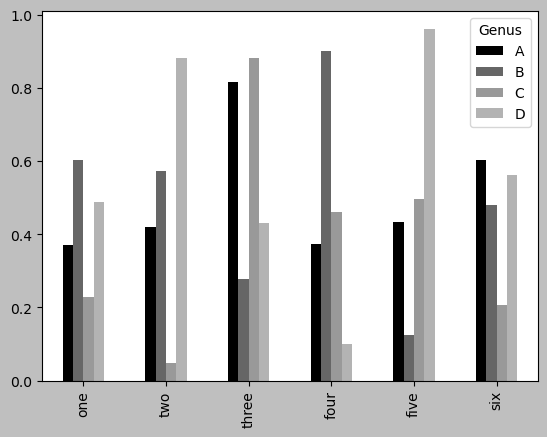

In [20]:
np.random.seed(12348)
df = pd.DataFrame(np.random.uniform(size=(6, 4)),
                  index=["one", "two", "three", "four", "five", "six"],
                  columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
print(df)
df.plot.bar();

<p>Note that the name “Genus” on the DataFrame’s columns is used to title the legend.</p>

<p>We create stacked bar plots from a DataFrame by passing <code>stacked=True</code>, resulting in the value in each row being stacked together horizontally (see next figure:</p>

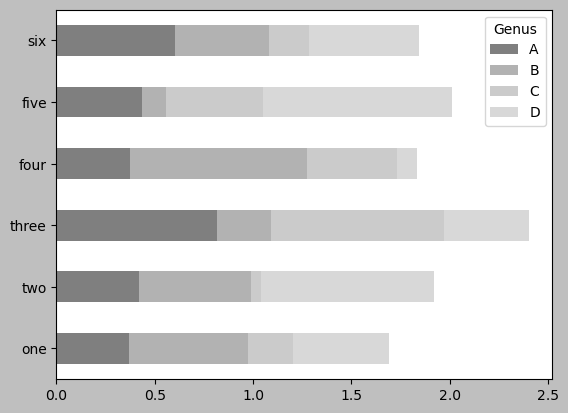

In [21]:
df.plot.barh(stacked=True, alpha=0.5);

<p><strong>Note</strong><br/>
    A useful recipe for bar plots is to visualize a Series’s value frequency using <code>value_counts</code>: <code>s.value_counts().plot.bar()</code>.

<p>Let's have a look at an example dataset about restaurant tipping. Suppose we wanted to make a stacked bar plot showing the percentage of data points for each party size for each day. I load the data using <code>read_csv</code> and make a cross-tabulation by day and party size. The <code>pandas.crosstab</code> function is a convenient way to compute a simple frequency table from two DataFrame columns:</p>

In [22]:
tips = pd.read_csv("examples/tips.csv")
print(tips.head())
party_counts = pd.crosstab(tips["day"], tips["size"])
party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])
party_counts

   total_bill   tip smoker  day    time  size
0       16.99  1.01     No  Sun  Dinner     2
1       10.34  1.66     No  Sun  Dinner     3
2       21.01  3.50     No  Sun  Dinner     3
3       23.68  3.31     No  Sun  Dinner     2
4       24.59  3.61     No  Sun  Dinner     4


size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


<p>Since there are not many one- and six-person parties, I remove them here</p>

In [23]:
party_counts = party_counts.loc[:, 2:5]

<p>Then, normalize so that each row sums to 1, and make the plot (see next figure)</p>

size         2         3         4         5
day                                         
Thur  0.827586  0.068966  0.086207  0.017241
Fri   0.888889  0.055556  0.055556  0.000000
Sat   0.623529  0.211765  0.152941  0.011765
Sun   0.520000  0.200000  0.240000  0.040000


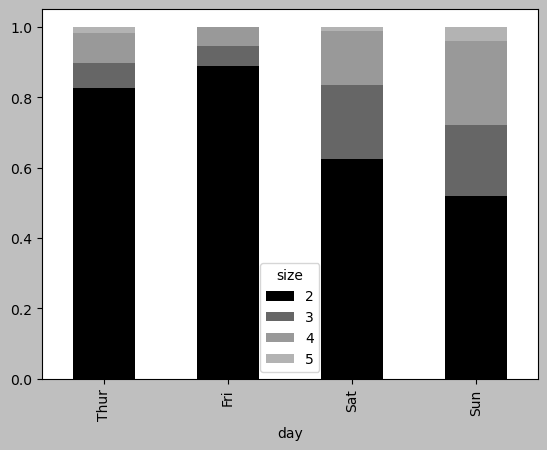

In [24]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(axis="columns"),
                              axis="index")
print(party_pcts)
party_pcts.plot.bar(stacked=True);

<p>So you can see that party sizes appear to increase on the weekend in this dataset.</p>

<p>With data that requires aggregation or summarization before making a plot, using the <code>seaborn</code> package can make things much simpler (install it with <code>conda install seaborn</code>). Let's look now at the tipping percentage by day with seaborn (see next figure for the resulting plot):

   total_bill   tip smoker  day    time  size   tip_pct
0       16.99  1.01     No  Sun  Dinner     2  0.063204
1       10.34  1.66     No  Sun  Dinner     3  0.191244
2       21.01  3.50     No  Sun  Dinner     3  0.199886
3       23.68  3.31     No  Sun  Dinner     2  0.162494
4       24.59  3.61     No  Sun  Dinner     4  0.172069


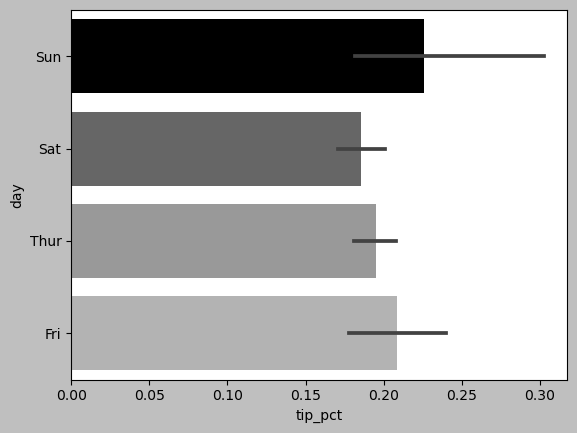

In [25]:
import seaborn as sns

tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
print(tips.head())
sns.barplot(x="tip_pct", y="day", data=tips, orient="h");

<p>Plotting functions in seaborn take a <code>data</code> argument, which can be a pandas DataFrame. The other arguments refer to column names. Because there are multiple observations for each value in the <code>day</code>, the bars are the average value of <code>tip_pct</code>. The black lines drawn on the bars represent the 95% confidence interval (this can be configured through optional arguments).</p>

<p><code>seaborn.barplot</code> has a <code>hue</code> option that enables us to split by an additional categorical value (see figure):</p>

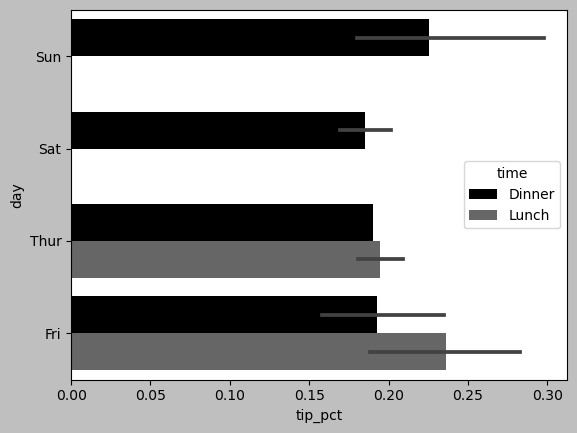

In [26]:
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h");

<p>Notice that seaborn has automatically changed the aesthetics of plots: the default color palette, plot background, and grid line colors. You can switch between different plot appearances using <code>seaborn.set_style:</code></p>

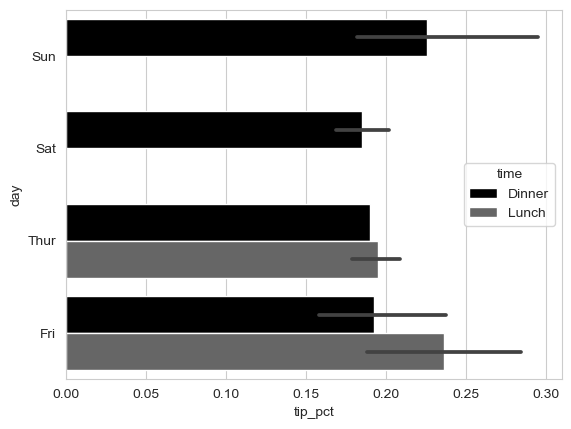

In [27]:
sns.set_style("whitegrid");
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h");

<p>When producing plots for black-and-white print medium, you may find it useful to set a greyscale color palette, like so:</p>


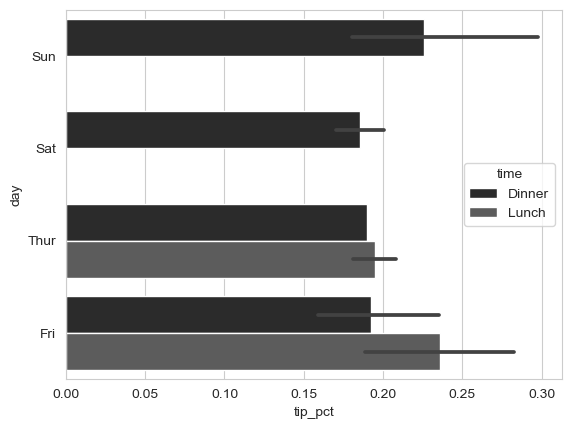

In [28]:
sns.set_palette("Greys_r")
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h");

<h3>Histograms and Density Plots</h3>

<p>A histogram is a kind of bar plot that gives a discretized display of value frequency. The data points are split into discrete, evenly spaced bins, and the number of data points in each bin is plotted. Using the tipping data from before, we can make a histogram of tip percentages of the total bill using the <code>plot.hist</code> method on the Series (see next figure):</p>

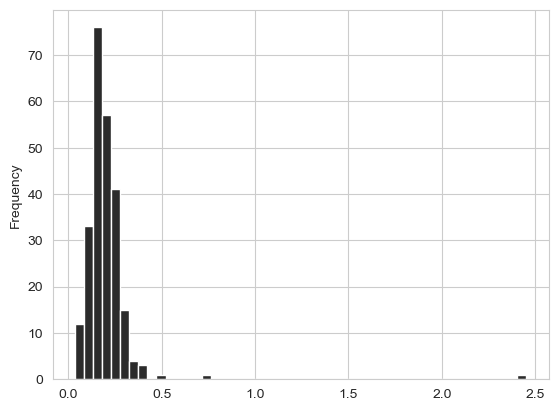

In [29]:
tips["tip_pct"].plot.hist(bins=50);

<p>A related plot type is a <em>density plot</em>, which is formed by computing an estimate of a continuous probability distribution that might have generated the observed data. The usual procedure is to approximate this distribution as a mixture of "kernels"—that is, simpler distributions like the normal distribution. Thus, density plots are also known as kernel density estimate (KDE) plots. Using <code>plot.density</code> makes a density plot using the conventional mixture-of-normals estimate (see next figure):</p>

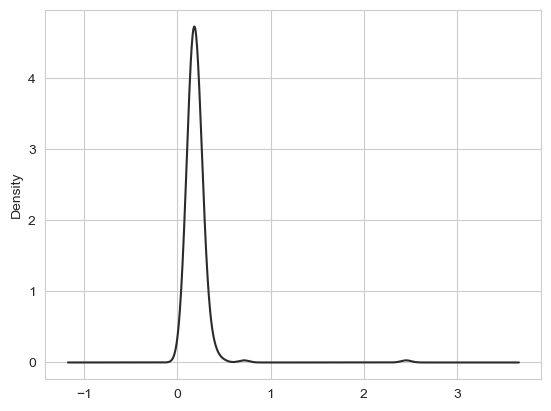

In [30]:
tips["tip_pct"].plot.density();

<p>This kind of plot requires SciPy, so if you do not have it installed already, you can pause and do that now:</p>

<p><code>conda install scipy</code></p>

<p>seaborn makes histograms and density plots even easier through its <code>histplot</code> method, which can plot both a histogram and a continuous density estimate simultaneously. As an example, consider a bimodal distribution consisting of draws from two different standard normal distributions (see next figure):

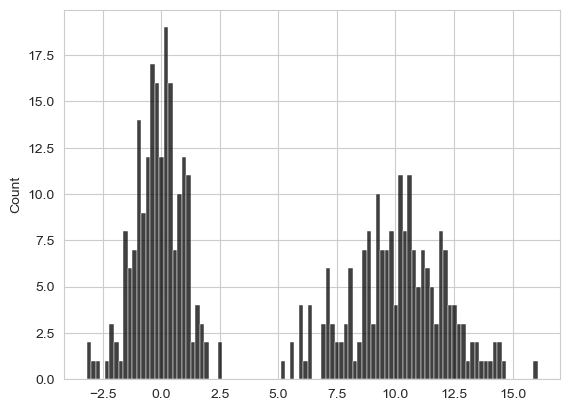

In [31]:
comp1 = np.random.standard_normal(200)
comp2 = 10 + 2 * np.random.standard_normal(200)
values = pd.Series(np.concatenate([comp1, comp2]))

sns.histplot(values, bins=100, color="black");

<h3>Scatter or Point Plots</h3>

<p>Point plots or scatter plots can be a useful way of examining the relationship between two one-dimensional data series. For example, here we load the <code>macrodata</code> dataset from the statsmodels project, select a few variables, then compute log differences:</p>

In [32]:
macro = pd.read_csv("examples/macrodata.csv")
data = macro[["cpi", "m1", "tbilrate", "unemp"]]
'''
pandas.DataFrame.diff
Calculates the difference of a DataFrame element compared 
with another element in the DataFrame (default is element in 
previous row).
'''
trans_data = np.log(data).diff().dropna()
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


<p>We can then use seaborn's <code>regplot</code> method, which makes a scatter plot and fits a linear regression line (see next figure):</p>

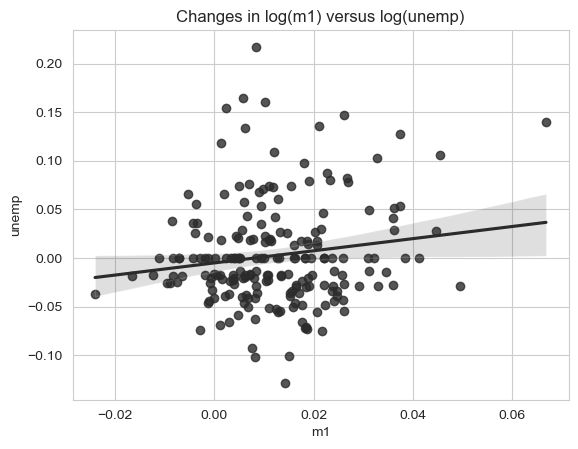

In [33]:
ax = sns.regplot(x="m1", y="unemp", data=trans_data)
ax.set_title("Changes in log(m1) versus log(unemp)");

<p>In exploratory data analysis, it’s helpful to be able to look at all the scatter plots among a group of variables; this is known as a <em>pairs</em> plot or <em>scatter plot matrix</em>. Making such a plot from scratch is a bit of work, so seaborn has a convenient <code>pairplot</code> function that supports placing histograms or density estimates of each variable along the diagonal (see next figure for the resulting plot):</p>

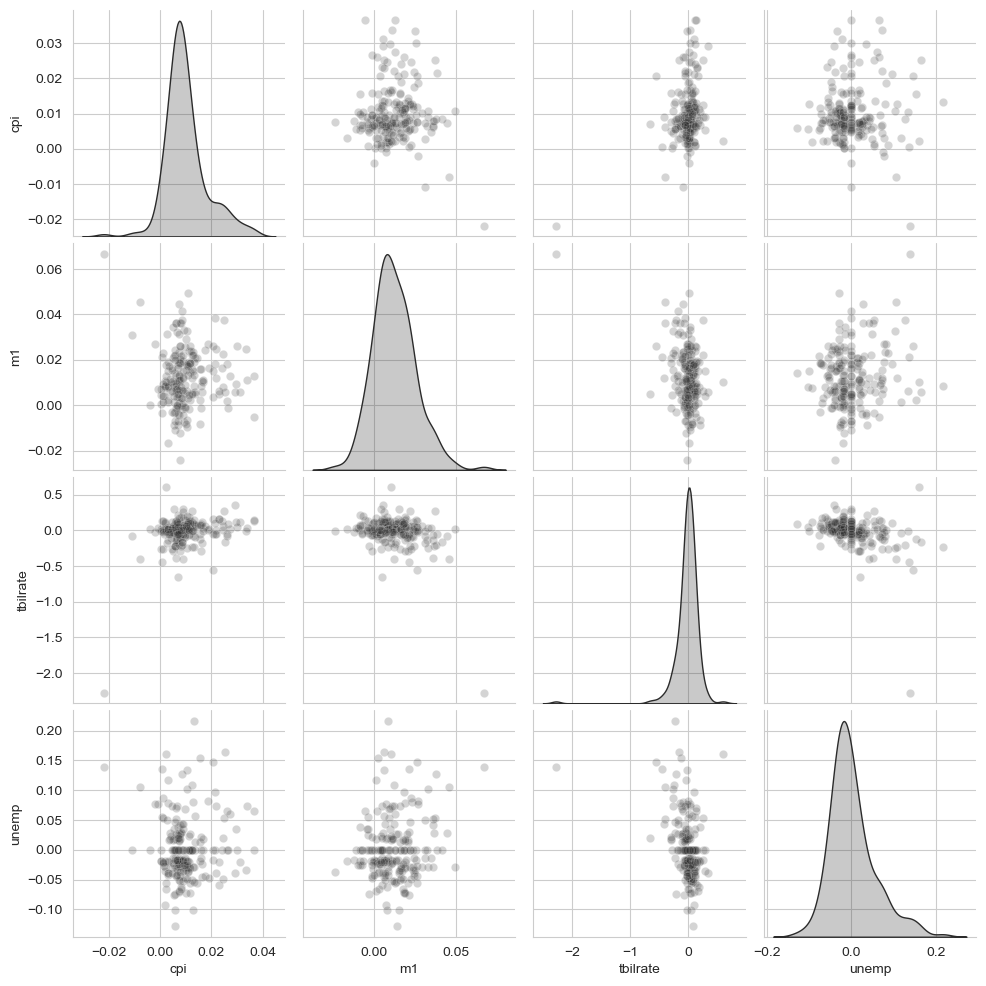

In [34]:
sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha": 0.2});

<p>You may notice the <code>plot_kws</code> argument. This enables us to pass down configuration options to the individual plotting calls on the off-diagonal elements. Check out the <code>seaborn.pairplot</code> docstring for more granular configuration options.<p>
    
<h3>Facet Grids and Categorical Data</h3>

<p>What about datasets where we have additional grouping dimensions? One way to visualize data with many categorical variables is to use a facet grid, which is a two-dimensional layout of plots where the data is split across the plots on each axis based on the distinct values of a certain variable. seaborn has a useful built-in function <code>catplot</code> that simplifies making many kinds of faceted plots split by categrical variables (see next figure for the resulting plot):</p>

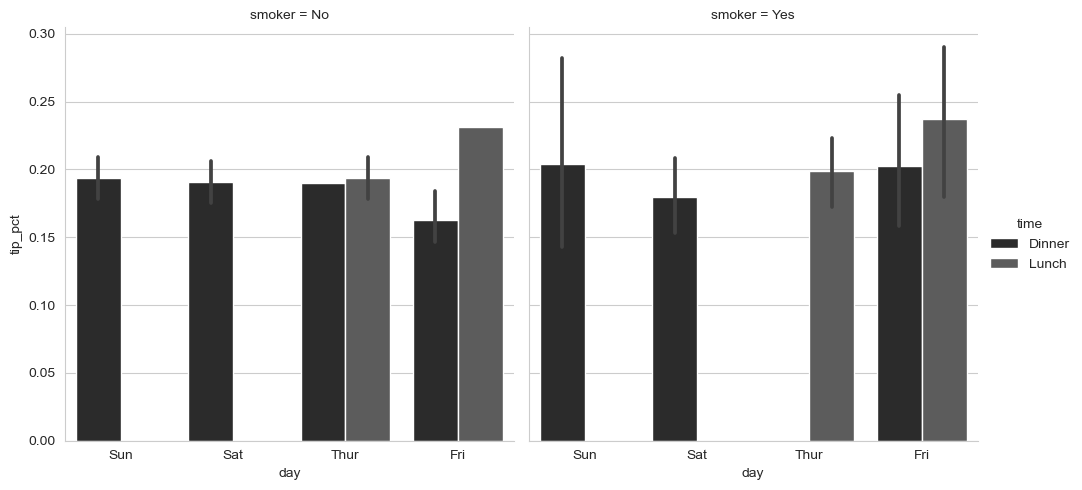

In [35]:
sns.catplot(x="day", y="tip_pct", hue="time", col="smoker",
            kind="bar", data=tips[tips.tip_pct < 1]);

<p>Instead of grouping by <code>"time"</code> by different bar colors within a facet, we can also expand the facet grid by adding one row per <code>time</code> value (see next figure):</p>

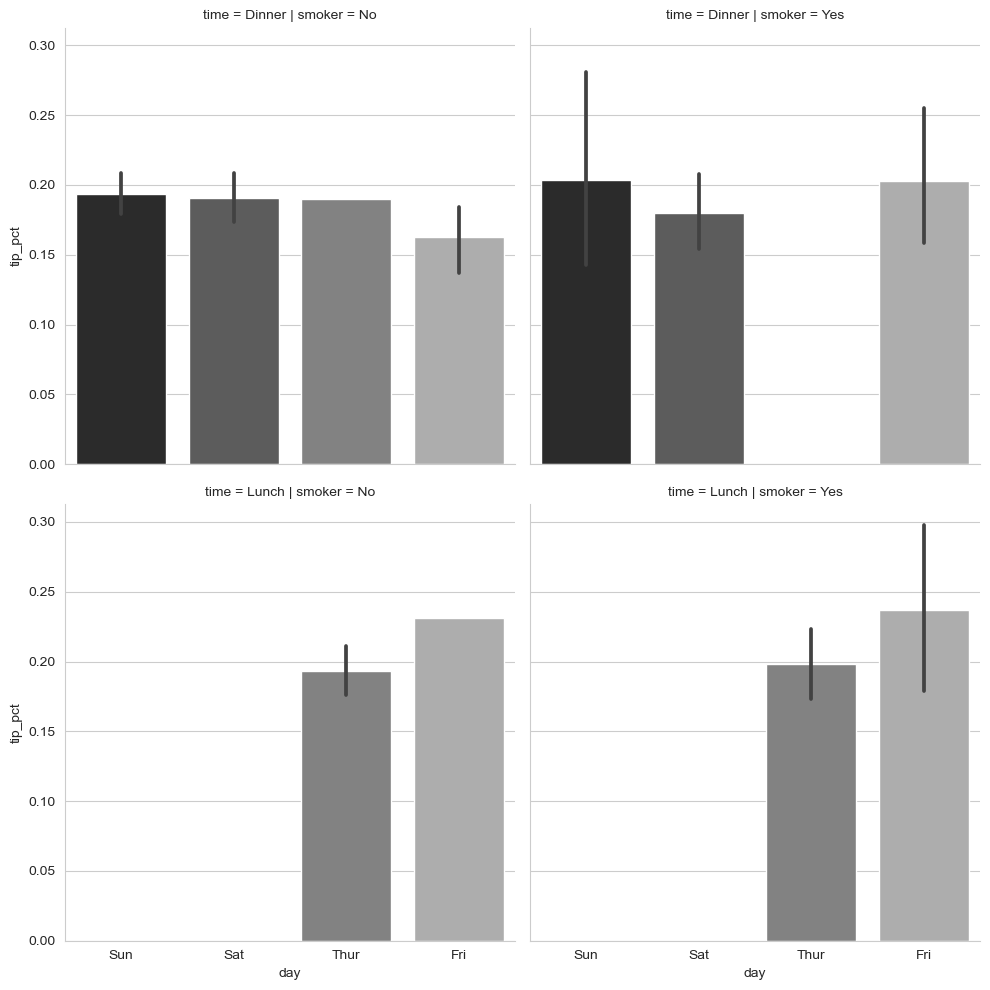

In [36]:
sns.catplot(x="day", y="tip_pct", row="time",
            col="smoker",
            kind="bar", data=tips[tips.tip_pct < 1]);

<p><code>catplot</code> supports other plot types that may be useful depending on what you are trying to display. For example, <em>box plots</em> (which show the median, quartiles, and outliers) can be an effective visualization type (see next figure):</p>

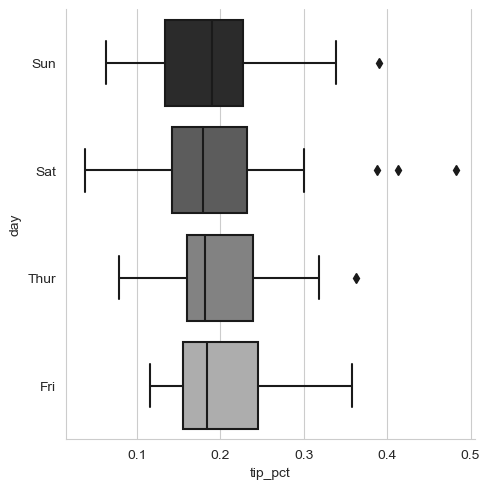

In [37]:
sns.catplot(x="tip_pct", y="day", kind="box",
            data=tips[tips.tip_pct < 0.5]);

<p>You can create your own facet grid plots using the more general <code>seaborn.FacetGrid</code> class. See the <a href="https://seaborn.pydata.org/">seaborn documentation</a> for more.</p>

<h2>9.3 Other Python Visualization Tools</h2>

<p>As is common with open source, there many options for creating graphics in Python (too many to list). Since 2010, much development effort has been focused on creating interactive graphics for publication on the web. With tools like <a href="https://altair-viz.github.io/">Altair</a>, <a href="http://bokeh.pydata.org/">Bokeh</a>, and <a href="https://plotly.com/python">Plotly</a>, it's now possible to specify dynamic, interactive graphics in Python that are intended for use with web browsers.</p>

<p>For creating static graphics for print or web, I recommend using matplotlib and libraries that build on matplotlib, like pandas and seaborn, for your needs. For other data visualization requirements, it may be useful to learn how to use one of the other available tools. I encourage you to explore the ecosystem as it continues to evolve and innovate into the future.</p>

<p>An excellent book on data visualization is <em>Fundamentals of Data Visualization</em> by Claus O. Wilke (O'Reilly), which is available in print or on <a href="https://clauswilke.com/dataviz">Claus's website</a>.

In [ ]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS